### 8. 시계열 자료의 탐색

`-` 시계열 자료의 평활

* 시계열 자료 = 신호(Signal) + 잡음(Noise).
* 목적 : 시계열 자료에서 의미있는 신호를 추정

* **평활** : 잡음으로 어지럽혀진 시계열 자료에서 신호를 매끈하게 분리해내는 기법

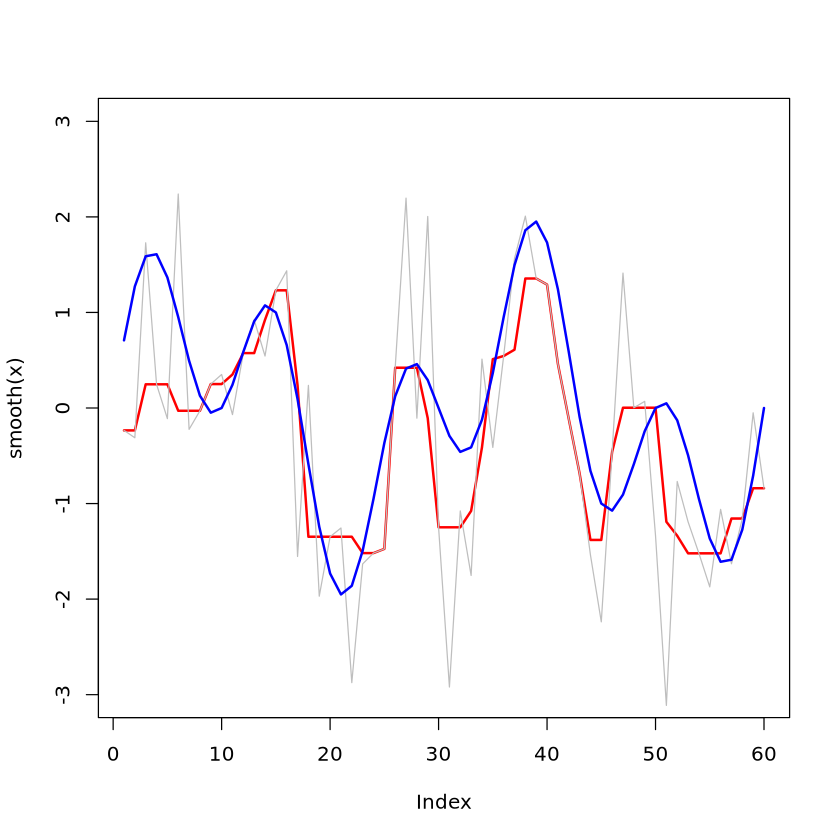

In [13]:
t = seq(1:60)
s = sin(2*pi*t/12) + sin(2*pi*t/30)
a = rnorm(60, 0, 1)
x = s+a

plot(smooth(x), type = 'l', lwd = 2, ylim = c(-3, 3), col = "red")  ## 3RS3R
lines(x, col = "grey")
lines(s, col = "blue", lwd = 2)

`-` 평활 방법

* 이동**평균**법(running **average**) : 2k개의 자료를 가지고 t시점의 값을 평활

$$smooth_t = \frac{(x_{t-k} + \cdots + x_t + \cdots + x_{t+k})}{2k+1}, ~ k+1 ≤ t ≤ n-k$$

> t시점의 앞뒤로 k개의 자료를 평균을 내어 평활한다. 이상치에 취약하다.

* 이동**중위수**(running **median**) : 2k개의 자료를 가지고 t시점의 값을 평활하되, 중위수로 t시점의 값을 택한다.

$$smooth_t = median(x_{t-k}, \cdots, x_t, \cdots, x_{t+k})$$

> 단순 평활기와 복합 평활기의 차이
>
> 단순 평활기 :  $smooth_{(t-\frac12)} = median(x_{t-2}, x_{t-1}, x_t, x_{t+1}), ~ smooth_{(t+\frac12)} = median(x_{t-1}, x_{t}, x_{t+1}, x_{t+2})$
>
> 복합 평활기 : $Smooth_t = \frac{smooth_{(t - \frac12)} + smooth_{(t+\frac12)}}{2}$
>
> * 위와 같은 평활을 42 평활이라고 한다.

`-` 여러 종류의 평활

* 3의 평활(단순 평활기) : $Smooth_t = median(x_{t-1}, x_t, x_{t+1})$

* 3R 평활 : 3의 평활을 더 이상 반복해도 동일한 결과가 나올 때까지 반복한다.

* 5의 평활 : $Smooth_t = median(x_{t_2}, x_{t-1}, x_t, x_{t+1}, x_{t+2})$

* 42 평활(복합 평활기) : 위에서 했던 평활. $Smooth_t = \frac{smooth_{(t - \frac12)} + smooth_{(t+\frac12)}}{2}$. 4의 평활을 앞뒤로 한 것의 중위수(평균)

`-` 해닝(Hanning)

$$\begin{align} Smooth_t = \frac{x_{t-1} + 2x_t + x_{t+1}}{4} \\ = \frac12(\frac{x_{t-1} + x_t}{2} + \frac{x_t + x_{t+1}}{2}) \end{align}$$

> 각 평균으로 평활한 것의 평균. 22 평활이라고 생각할 수 있다.
>
> 3의 평활을 한 후 이용하면 부드러워진다. $\to$ 3H 평활

`-` 분리(splitting)

평평한 봉우리나 골짜기가 있는 경우 두 값을 흐트러뜨리는 기법

$$X_t = X_u, u = t+1$$

> 서로 인접해있는 두 값

$$smooth_t = median(X_{t-1}, X_t, X_{t+1}^*), X_{t+1}^* = 3X_{t-1} - 2X_{t-2}$$

$$smooth_u = median(X_{u-1}^*, X_u, X_{u+1}), X_{u-1}^* = 3X_{u+1} - 2X_{u+2}$$

부드럽게 시계열 데이터를 평활할 수 있는 방법

`-` 4253H, twiceit

1) 42평활 시행
2) 5 이동 중위수로 재평활
3) 3 이동 중위수로 재평활
4) 해닝(22평활)으로 이상치 제거
5) twiceit, 4253H 평활한 수계열을 기존 수계열에 빼서 남은 거칠음에 대하여 4253H 방법을 한 번 더 사용하여 평활한다. 그리고 둘을 더한다.

$$4253H, twiceit = X'_t + X''_t = smooth_t$$

`-` 3RSSH, twiceit

1) 3R 평활 시생
2) 분리(splitting)
3) 한번 더 분리(splitting)
4) 해닝(22평활)으로 이상치 제거
5) twiceit

`-` 끝값의 평활

1) 베껴쓰기 : $smooth_1 = x_1, smooth_n = x_n$
2) 분리(Splitting)의 원리 이용

$$x^*_0 = 3x_2 - 2x_3 \to Smooth_1 = median(x^*_0, x_1, x_2)$$

$$x^*_{n+1} = 3x_{n-1} - 2x_{n-2} \to Smooth_n = median(x_{n-1}, x_n, x^*_{n+1})$$

In [ ]:
smooth(x, kind = "3RS3R", twiceit = TRUE,  ## 3RS3R, 3RSS, 3RSR, 3R, 3, S
      endrule = "Tukey", do.ends = FALSE)  ## Tukey, copy

`-` 계절성 시계열의 분해 : 1년을 주기로 계절성을 가지는 시계열 자료(기온, 강수량, 수입, 수출 등)

$$x_t = T_t + S_t + a_t, ~ a_t \sim (0, \sigma)$$

$T_t : $ 추세, $S_t : $ 계절성, $a_t : $ 잡음

* 계절성 조정 : $\tilde x_t = x_t - S_t = T_t + a_t$

> 원자료를 로그변환한 후, `decompose()`함수를 사용하면 계절성을 분해할 수 있다.

In [37]:
setwd("~/R/EDA/data/")
Export = read.table("Export_1988.txt", header = T)
Series = ts(Export$Series, start = c(1988, 1), frequency = 12)

In [50]:
print(Series)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1988  3958510  4121101  4791555  4626467  4773409  5052377  5202800  5309870
1989  4400835  4336799  5329656  4783722  4950047  5427447  5232679  5268333
1990  3961054  4679889  5271316  4949850  5214809  5688724  5489520  5321170
1991  4639438  4865482  5725879  5838734  6146188  6660355  5540040  5762574
1992  5392308  5144165  6428776  6360946  6337088  7053355  6351883  6176555
1993  5328925  5935294  6914791  6750706  6743281  7248353  6661972  6543794
1994  6067779  6202545  7613307  7668380  7857583  8303631  7610753  7601015
1995  7763771  8430052  9998218 10158376 10645669 11245523 10485091 10613203
1996  9922981  9883554 11689417 10637203 11235754 11302160  9896713  9687368
1997  9034439  9362328 11326864 11395617 11744573 12391593 11806838 11040483
1998  9000456 11221887 12009284 12060649 11308332 11508916 10023785  9709131
1999  9259511  9337212 11657190 11499780 11422801 12819358 11751365 11369995

In [45]:
# decompose(log(Series))$season # : S_t 데이터
exp(decompose(log(Series))$trend)  ## T_t 데이터

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1988,NA,NA,NA,NA,NA,NA,5038731,5071788,5105170,5135007,5149955,5173170
1989,5189867,5189407,5190964,5196186,5192271,5180006,5150976,5144725,5158705,5163680,5182269,5203716
1990,5224341,5236959,5263223,5286616,5299612,5340606,5403378,5447907,5475582,5532427,5608903,5684667
1991,5724324,5745556,5747101,5784225,5864657,5912585,5972520,6024024,6067221,6118362,6148070,6170633
1992,6220736,6274393,6333048,6392708,6409714,6382711,6354631,6389473,6447219,6482871,6515800,6540116
1993,6560568,6589449,6627696,6663631,6705744,6775200,6853161,6902994,6943460,7008479,7090839,7176696
1994,7257607,7343666,7434212,7532224,7658171,7821386,7994237,8180685,8380567,8576162,8787726,9012798
1995,9250076,9505689,9751583,9973998,10175172,10308250,10455368,10633058,10773692,10864905,10910273,10937114
1996,10913112,10845557,10762282,10732730,10742656,10757475,10732765,10666789,10628774,10645334,10695646,10756568
1997,10877583,11017721,11136233,11218568,11259858,11285352,11291514,11375288,11489456,11544748,11553828,11500156


`-` 자기상관함수(ACF)

* k차 자기상관 : $t$와 $(t - k)$시점 간의 상관관계

$$r_k = \frac{\Sigma_{i = k+1}^{n}(x_i - \bar x)(x_{i-k} - \bar x)}{\Sigma_{i = 1}^{n}(x_i - \bar x)^2}, ~ k : lag$$

>  $k = 1$인 경우 : 1차 자기상관회귀모형의 $\hat \rho$과 동일

In [57]:
library(MASS)
data(geyser)

[1]  1.000 -0.702  0.547 -0.445  0.386


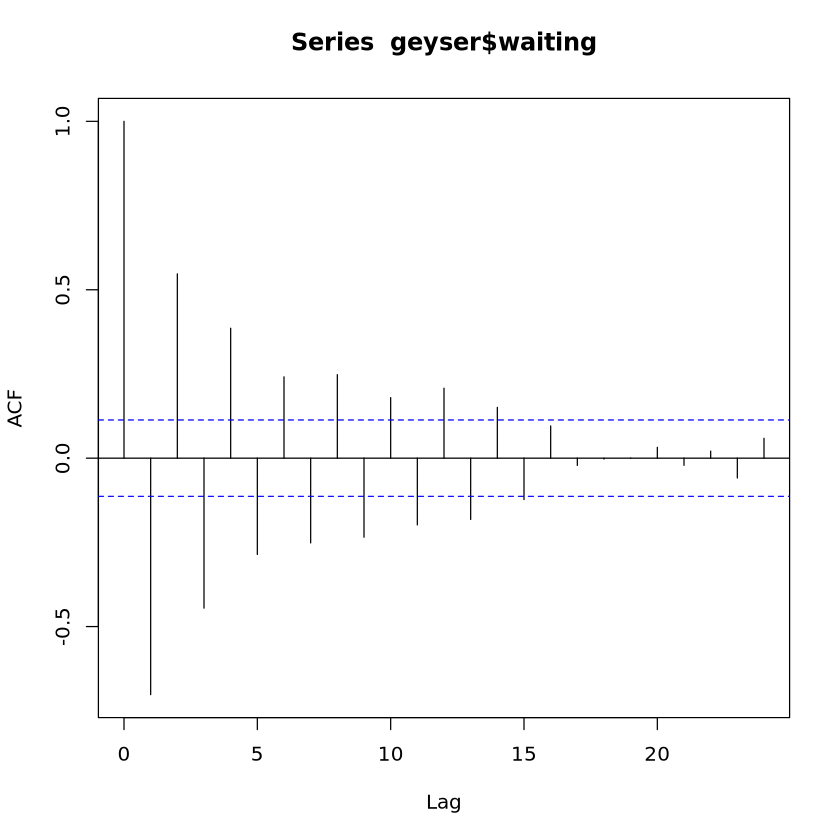

[1]  1.000 -0.657  0.553 -0.398  0.346


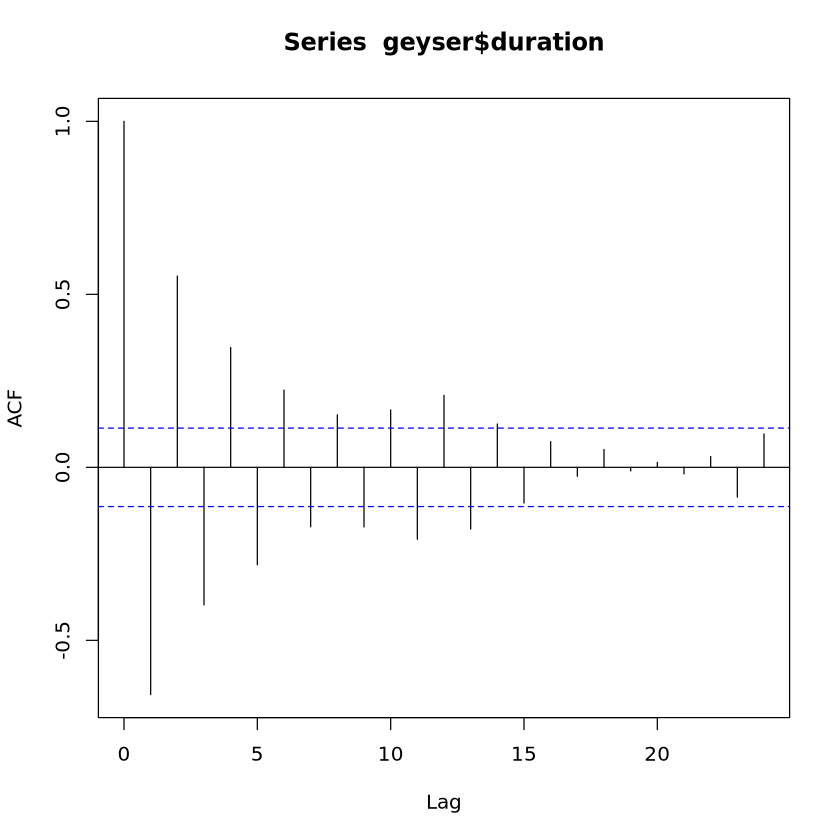

In [55]:
print(round(acf(geyser$waiting)$acf[1:5], 3))
print(round(acf(geyser$duration)$acf[1:5], 3))

> ACF는 자기상관을 도시화한 것. 위 경우 번갈아가면서 양과 음의 상관이 있음. 즉, 한 번 waiting(duration)이 길면 다음엔 짧아지고, 다음엔 길어진다는 것을 알 수 있음.

`-` 교차상관계수(CCF)

* $x_t$와 $y_{t-k}$간의 상관관계

$$c_k = \frac{\Sigma_{i = k+1}^{n}(x_i - \bar x)(y_{i-k} - \bar y)}{\sqrt{\Sigma_{i = 1}^{n}(x_i - \bar x)^2 \Sigma_{i = 1}^{n}(y_i - \bar y)^2}}, ~ k : lag$$

>  $c_{-1} = cor(x_t, y_{t+1}), ~ c_1 = cor(x_t, y_{t-1})$

-21,0.038
-20,-0.023
-19,-0.005
-18,0.009
-17,0.000
-16,0.009
-15,0.046
-14,-0.079
-13,0.146
-12,-0.166
-11,0.190


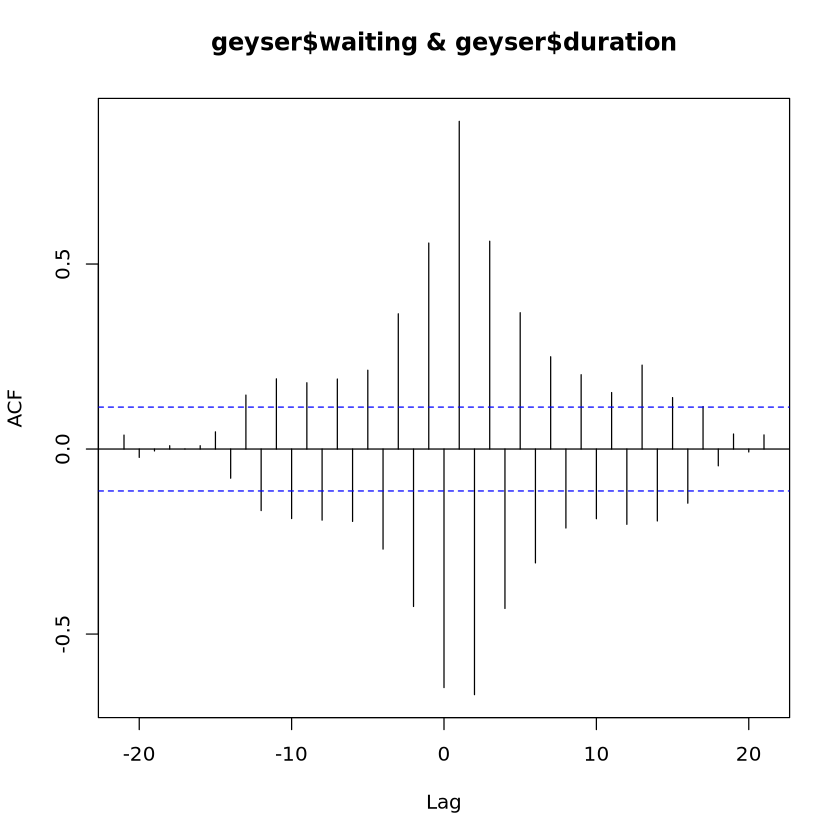

In [62]:
round(cbind(ccf(geyser$waiting, geyser$duration)$lag, ccf(geyser$waiting, geyser$duration)$acf), 3)

> -21차 교차상관계수($cor(x_t, y_{t+21})$)부터 21차 교차상관계수($cor(x_t, y_{t-21})$)까지를 그래프로 나타내었다.

### 9. 로버스트 선형회귀

`-` 최소제곱추정량(OLSE)

$$Y_i = \beta_0 + \beta_1 X_{1i} + \cdots \beta_p X_{pi} + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, n$$

`-` 최대우도추정량(MSE)

$$\hat{\beta}^{MSE} = \underset{\beta}{arg ~ max} ~ L = \Pi_{i=1}^{n}f(\epsilon_i) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp(- \frac{\Sigma_{i=1}^{n}\epsilon_i^2}{2\sigma^2}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp (- \frac{\Sigma_{i = 1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2})$$

> 두 추정량은 이상치에 민감함. 저항성이 없음.

`-` M-추정량

$$\begin{align} \rho_1(z) & = z^2, ~ ~~~~~~~~~~~~~ |z| < c, \\ 
                         & = c(2|z| - c), ~ o.w.
\end{align}$$

$$\hat{\beta}_0, \hat\beta_1 = arg ~ \underset{\beta_0, \beta_1}{min} \Sigma_{i=1}^{n} \rho_1(\frac{r_i}{\tilde{\sigma}})$$

$$\tilde \sigma = median(|r1|, \cdots, |r_n|)/0.675$$

In [63]:
set.seed(1234567)
x = seq(1, 10)
y = -2.5 + 0.5*x + rnorm(10, 0, 1)
y[10] = -10

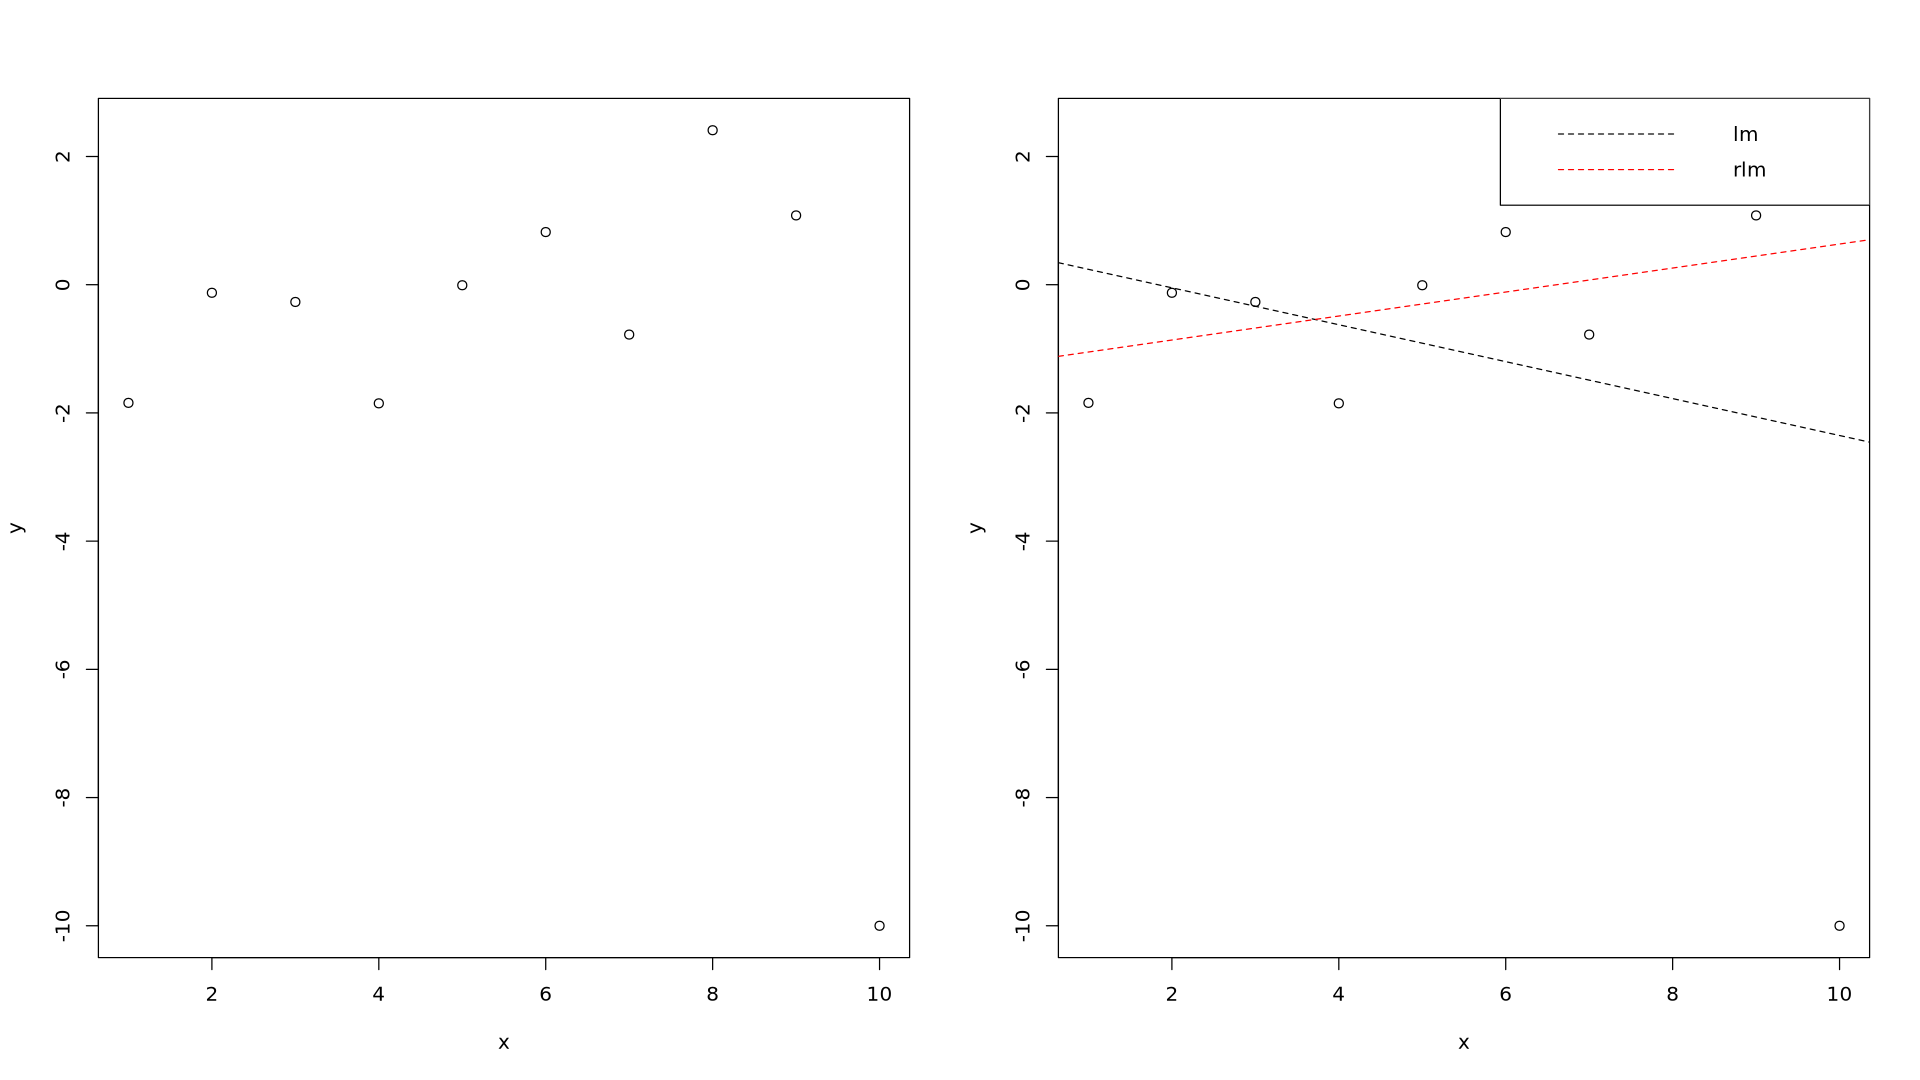

In [64]:
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfcol = c(1, 2))


library(MASS)
m0 <- lm(y~x)
m1 <- rlm(y~x)

plot(y~x)
plot(y~x)
abline(m0, lty = 2)
abline(m1, lty = 2, col = 'red')
legend(x = "topright", legend = c('lm', 'rlm'), col = c('black', 'red'), lty = 2)

> 손으로 이걸 어떻게 계산해, 못해. 그런 문제 나오면 그냥

`-` LMS(least median of square) 추정량 : 잔차제곱의 중앙값을 최소화하는 통계량을 구한다.

$$\hat \beta_0, ~ \hat \beta_1 = arg~ \underset{\beta_0, \beta_1}{min}~~ median(r_1^2, r_2^2, \cdots, r_n^2)$$


> 이상점에는 강건하지만, 추정치가 몬테카를로 반복 시행에 의해 얻어지므로 불안정하다.

In [66]:
lqs(y~x, method = "lms")  ## quantile default : floor((n+1)/2) = 5

Call:
lqs.formula(formula = y ~ x, method = "lms")

Coefficients:
(Intercept)            x  
    -0.8961       0.2368  

Scale estimates 0.4394 0.3132 


`-` LTS(least trimmed squares) 최소절삭제곱 : LSE 방법을 사용하되, 이상값에 해당하는 자료를 버리고 추정

$$\hat \beta_0, ~ \hat \beta_1 = arg ~ \underset{\beta_0, ~ \beta_1}{min} ~~ \Sigma_{i=1}^{q}r_{(i)}^2, ~ q = n\times 0.75; \frac12 < p ≤ n$$

In [97]:
lqs(y~x, method = "lts") ## quantile default : floor(n/2) + floor((p+1)/2) = 6

Call:
lqs.formula(formula = y ~ x, method = "lts")

Coefficients:
(Intercept)            x  
    -1.2375       0.2723  

Scale estimates 1.017 1.101 


In [95]:
lqs(y~x, method = "lts", quantile = 6)

Call:
lqs.formula(formula = y ~ x, quantile = 6, method = "lts")

Coefficients:
(Intercept)            x  
    -1.2375       0.2723  

Scale estimates 1.017 1.101 


### 10. 이변량 자료의 분석

`-` 산점도와 흐트림(jittering)

`jitter()` : 정수 자료의 플로팅 가시성 향상을 위한 기법

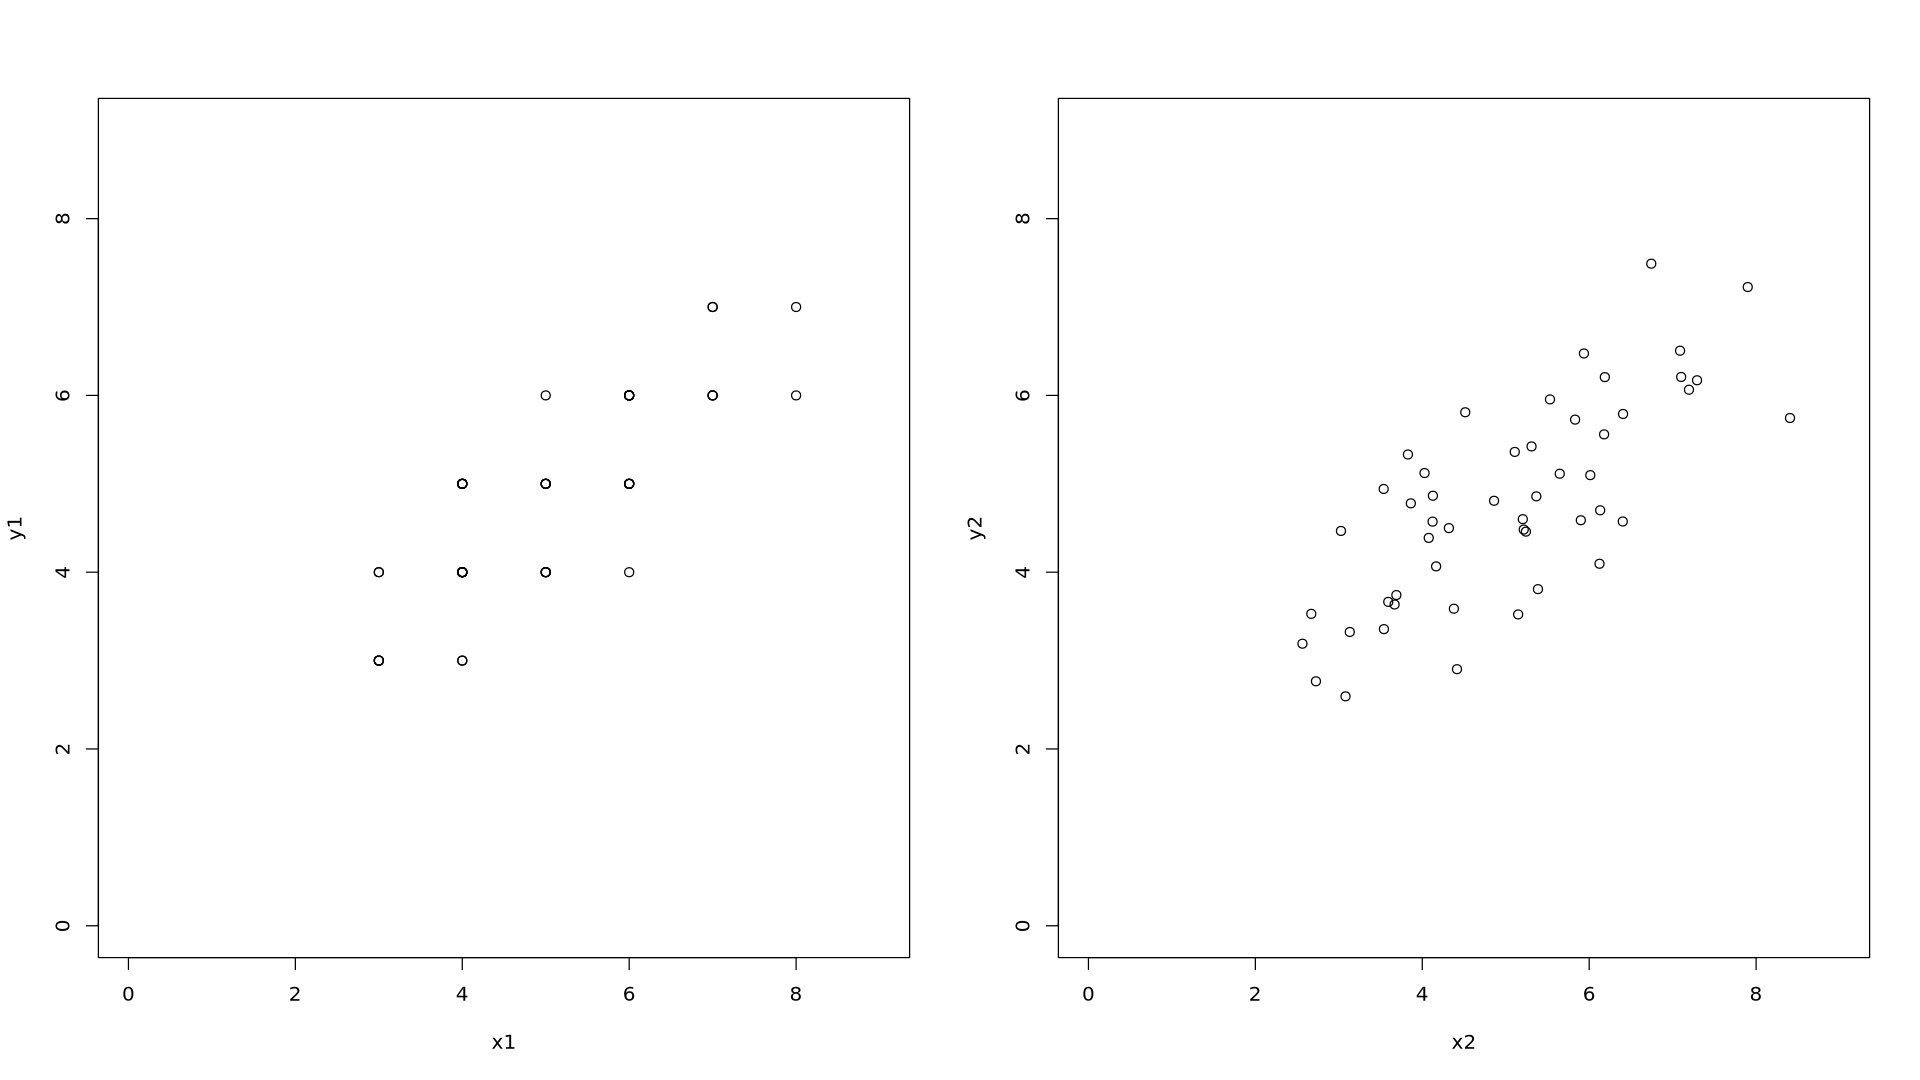

In [162]:
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfrow = c(1, 2))

x = rnorm(50) + 5
y = rnorm(50)*0.6 + (x-5)*0.8 + 5

## 정수 자료
x1 = round(x)
y1 = round(y)
plot(y1~x1, xlim = c(0, 9), ylim = c(0, 9))

## U(-0.5, 0.5)에서 난수를 뽑아 자료에 더함
x2 = x1 + runif(50, -0.5, 0.5)
y2 = y1 + runif(50, -0.5, 0.5)
plot(y2~x2, xlim = c(0, 9), ylim = c(0, 9))

## jitter() 함수에서 동일한 알고리즘을 사용한다.
# x2 = jitter(x1, amount = 0.5)  ## 앞뒤로 0.5만큼
# y2 = jitter(y1, amount = 0.5)
# plot(y2~x2, xlim = c(0, 9), ylim = c(0, 9))

`-` 구간 별 상자 그림

In [163]:
library(lattice)
data(quakes)

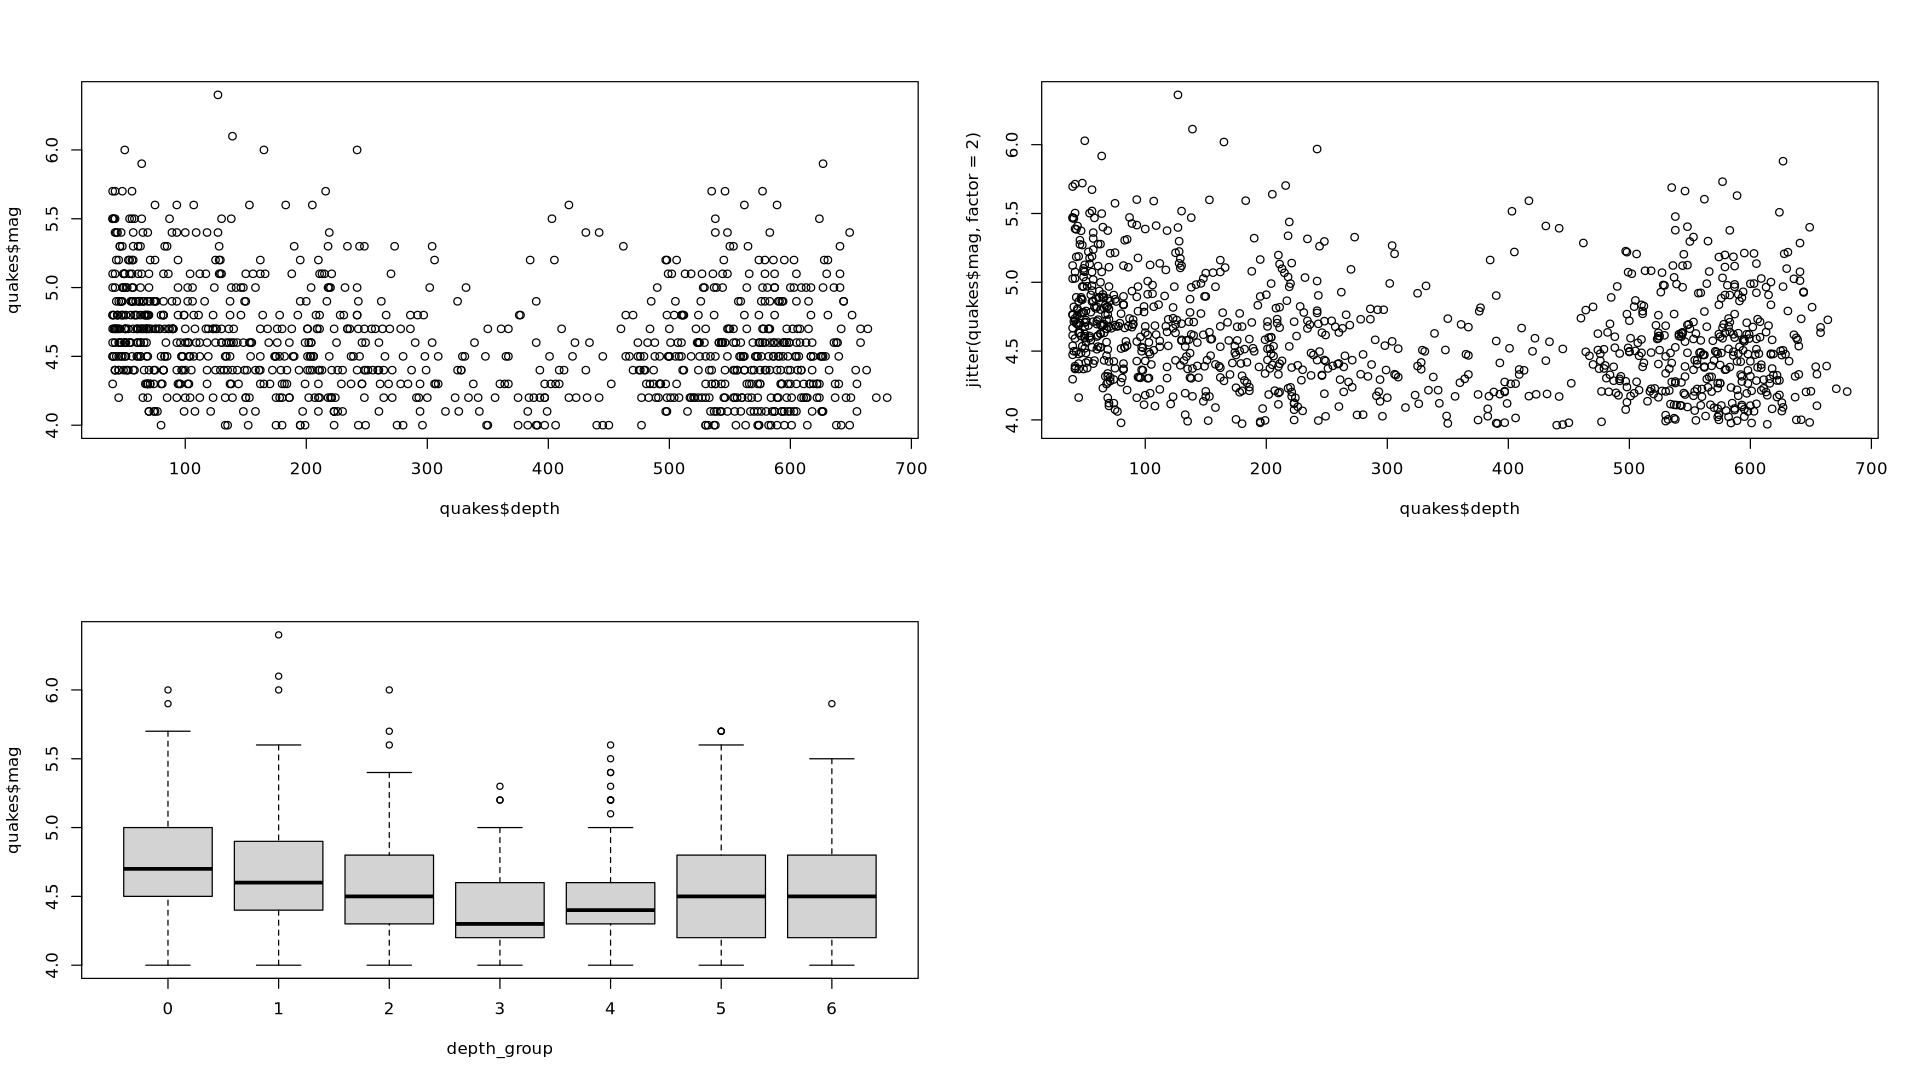

In [181]:
par(mfrow = c(2, 2))
plot(quakes$depth, quakes$mag)
plot(quakes$depth, jitter(quakes$mag, factor = 2))  ## factor, jittering from scales
depth_group = trunc(quakes$depth/100)  ## 100단위로 끊어내는 거니까 trunc가 맞음. 소수점 제거니까.
boxplot(quakes$mag~depth_group)

`-` 부호 그래프(symbol graph) : `lattice::symbols`

> x와 y의 산점도 상의 개별 자료 점에 z값의 크기에 비례하는 부호를 그림. 3차원 그래프

In [144]:
library(lattice)
data(trees)
attach(trees)

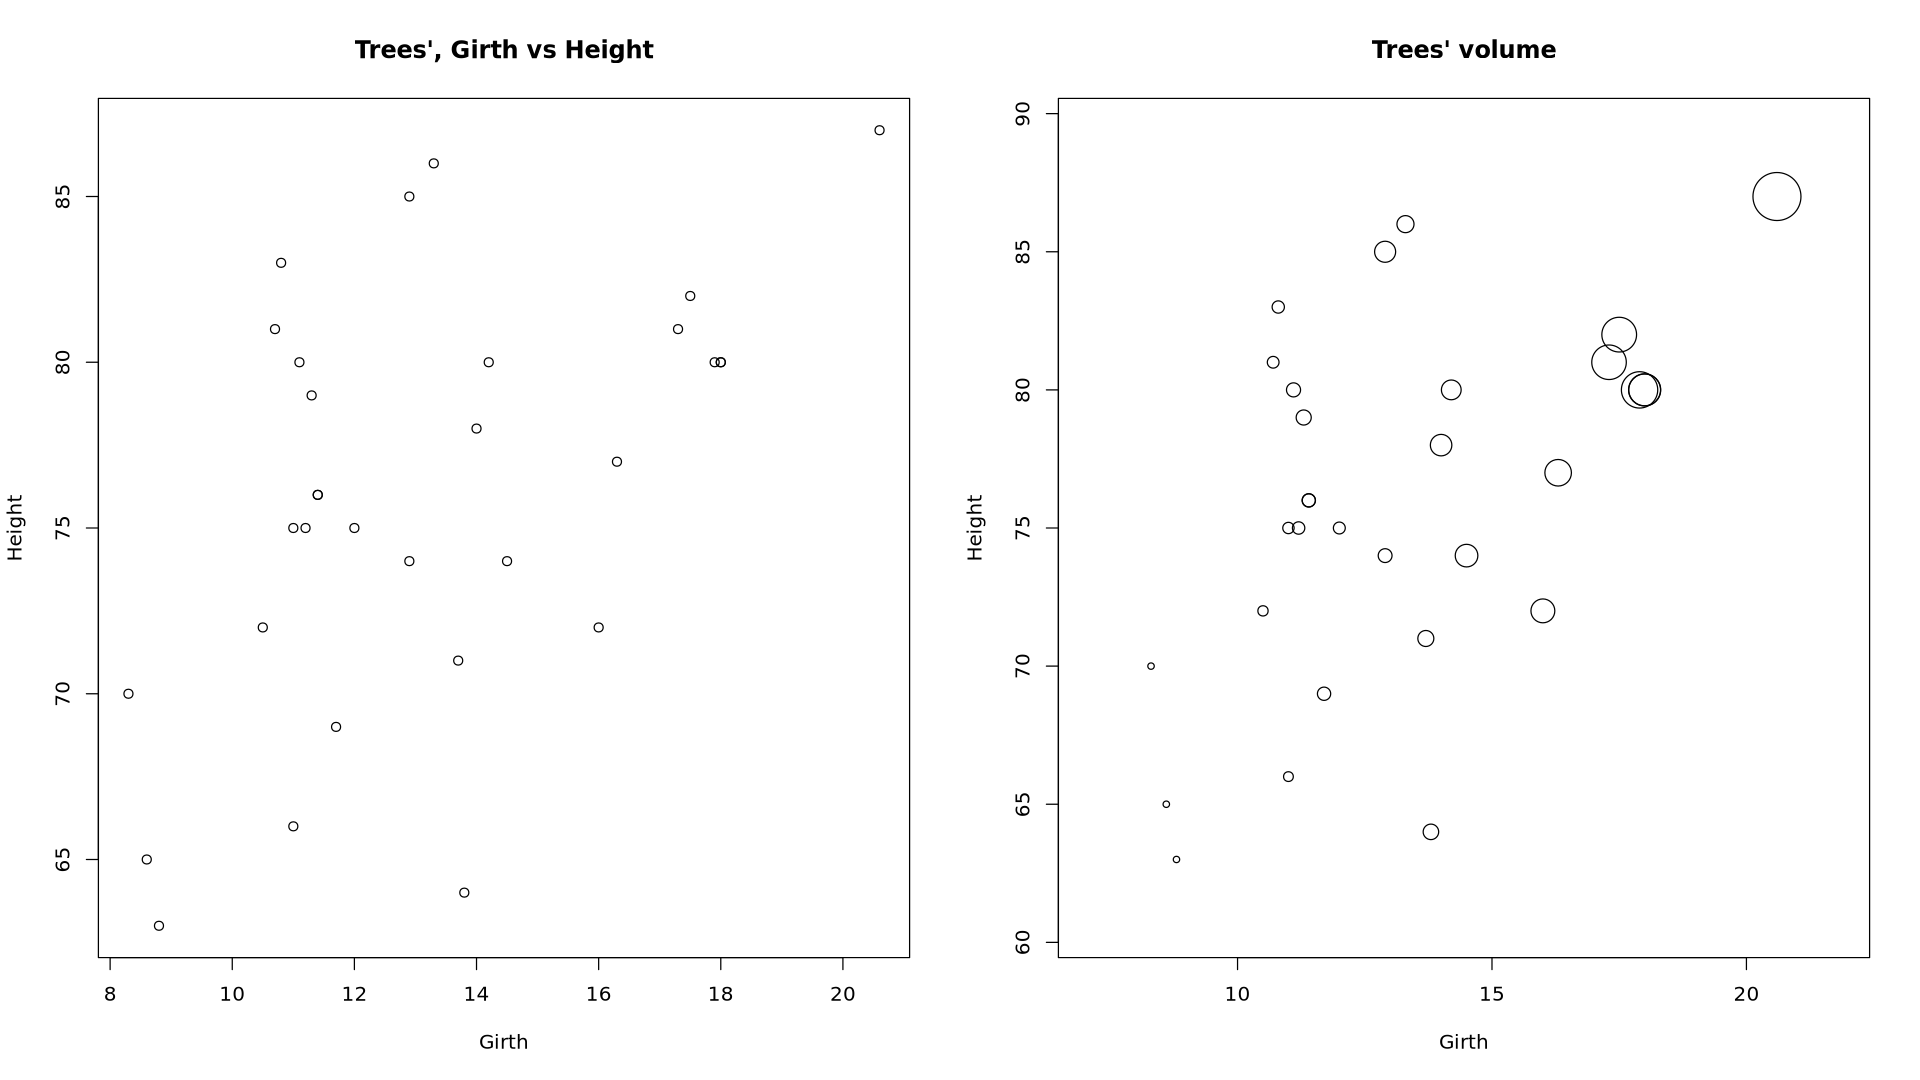

In [149]:
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfrow = c(1, 2))
plot(Girth, Height, main = "Trees', Girth vs Height")
symbols(Girth, Height, circles = Volume, inches = 0.2, main = "Trees' volume")  ## circles가 z

`-` 온도계 그림(thermometer)

> 산점도의 각 점에 온도계를 그리고, 눈금에 z값을 표시한다. 가시성 쓰레기인데 왜씀.

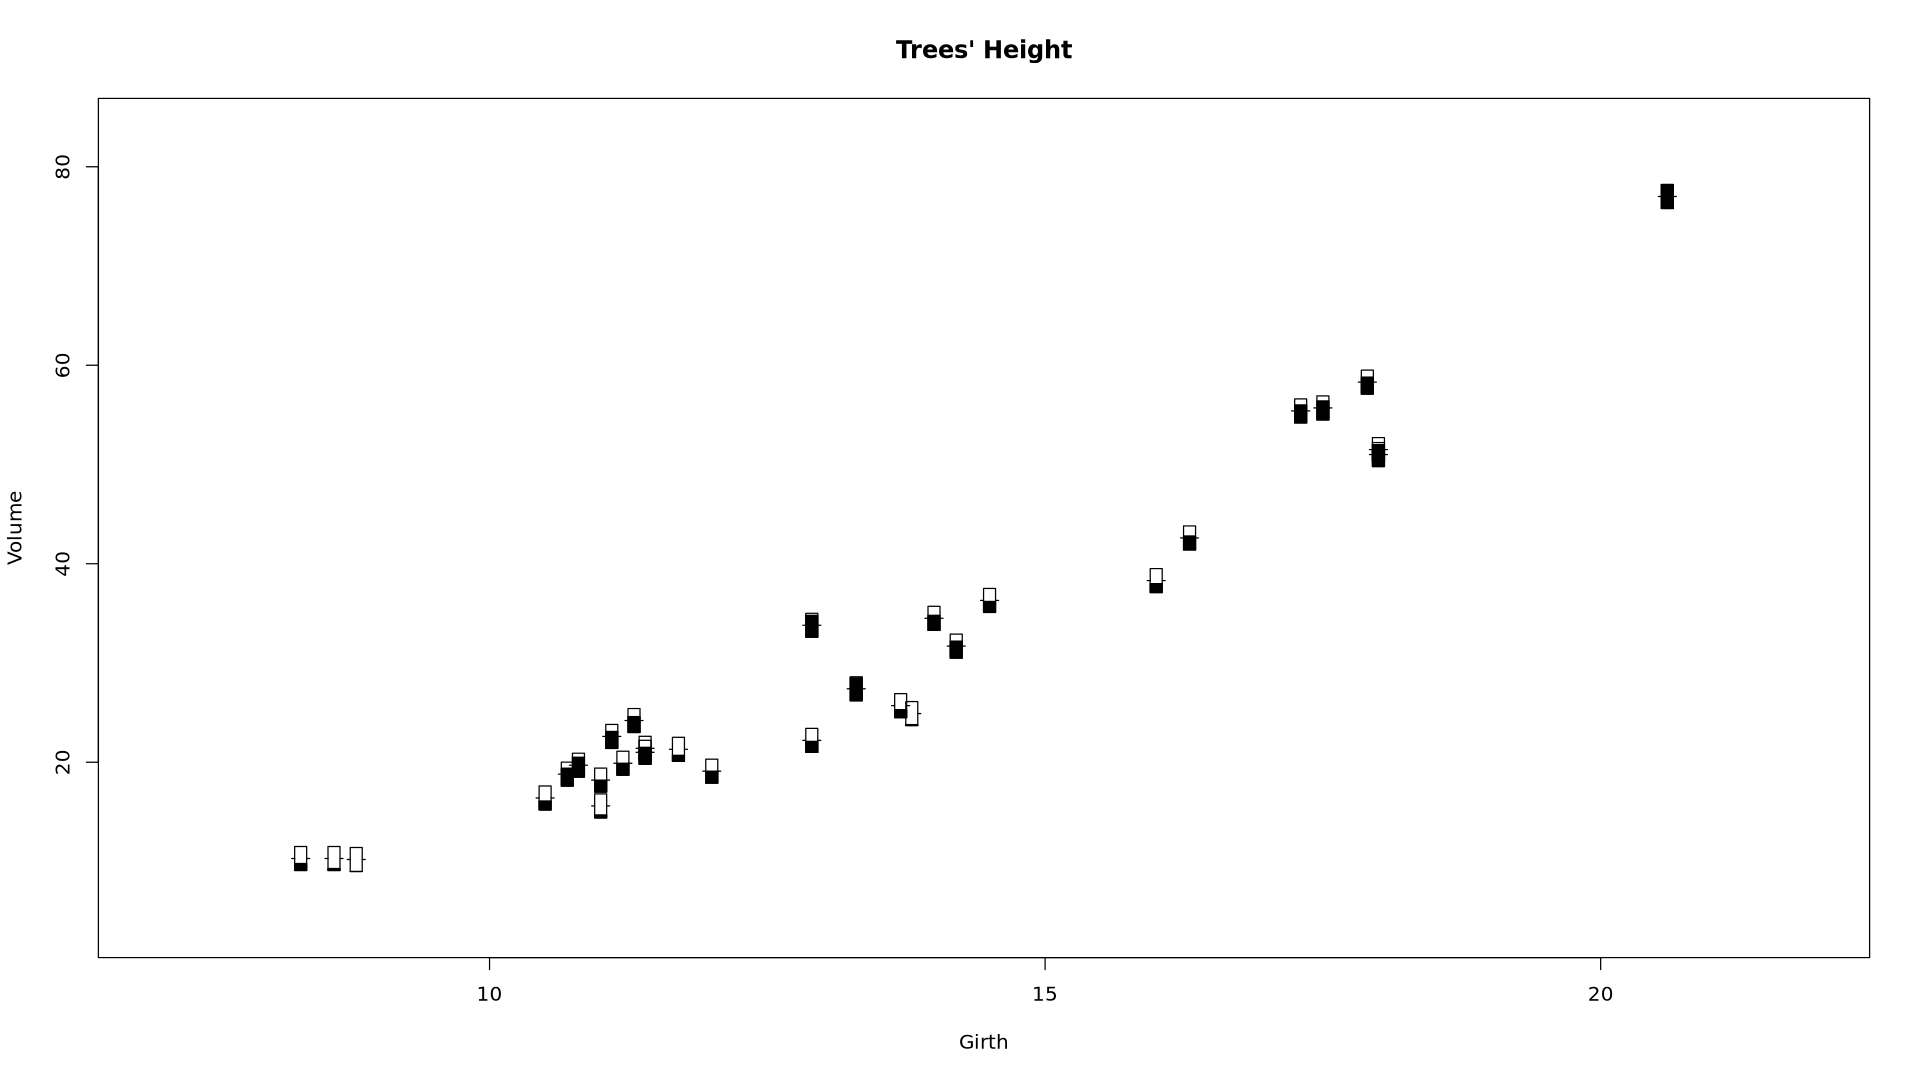

In [186]:
Rel.Height = (Height - min(Height))/(max(Height) - min(Height))  ## 0에서 1 사이의 값이 되도록 scaling
symbols(Girth, Volume, thermometers = cbind(0.5, 1, Rel.Height), inches = 0.2, main = "Trees' Height")

`-` 밀도함수의 추정

* 모수적 추정방법 : 미지의 확률밀도함수가, 어떤 확률밀도함수의 범주에 속한다고 가정한다.

> 표본자료로부터 표본평균과 표본분산을 구해 정규분포의 확률밀도함수에 대입

* 비모수적 추정방법 : 확률밀도함수 형태를 가정하지 않고, 주어진 자료로부터 직접 함수(구체적인 분포가 아닌 함수의 높이)를 추정

> 막대그래프로 추정한 누적분포함수(cdf)  $$F(x) = \frac1n \Sigma_{i = 1}{n} I(X_i ≤ x)$$

**히스토그램에 의한 밀도함수 추정방법**

아주 작은 $h$에 대하여

$$\hat f (x) = \frac{\hat F (x+h) - \hat F (x)}{h} = \frac{1}{nh} \Sigma_{i=1}^{n} I(x < X_i ≤ x+h)$$

> 그리기 쉽지만, 도수분포표의 결과에 따라 모양이 크게 달라진다. 계급의 시작점과 크기(h)에 따라 모양이 크게 달라진다.

**커널에 의한 밀도 추정**

자료의 밀도함수에 대한 특정 형태를 가정하지 않고 밀도에 대한 추정량을 계산.

$$x_1, x_2 \cdots x_n \overset{i.i.d}{\sim} f(x) \to \hat f(x) = \frac1n \Sigma_{i = 1}^{n} \frac1b K(\frac{x - x_i}{b})$$


$$\hat f(x) = \frac{1}{nb} (K(\frac{x - x_1}{b}) + K(\frac{x - x_2}{b}) + \cdots + K(\frac{x - x_n}{b})) = \frac{1}{nb} (\frac{1}{\sqrt{2\pi}}e^{-\frac{(x - x_1)^2}{2b^2}} + \frac{1}{\sqrt{2\pi}}e^{-\frac{(x - x_2)^2}{2b^2}} + \cdots + \frac{1}{\sqrt{2\pi}}e^{-\frac{(x - x_n)^2}{2b^2}})$$

 $K(z), b$의 디폴트 값

$$K(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}, b = 0.9 \times min(s, \frac{IQR}{1.35}) n^{-\frac15}, s : sd(x)$$

여기에서 커널은 $K(z) > 0$, 띠 넓이는 $b > 0$

> 표준화된 각 데이터에 대한 확률밀도함수이고, 그것들을 엔빵해서 더해준다.

`-` 히스토그램에 의한 밀도함수 추정 `hist()` vs 커널에 의한 밀도 추정 `density()`

In [2]:
library(MASS)
data(geyser)
attach(geyser)

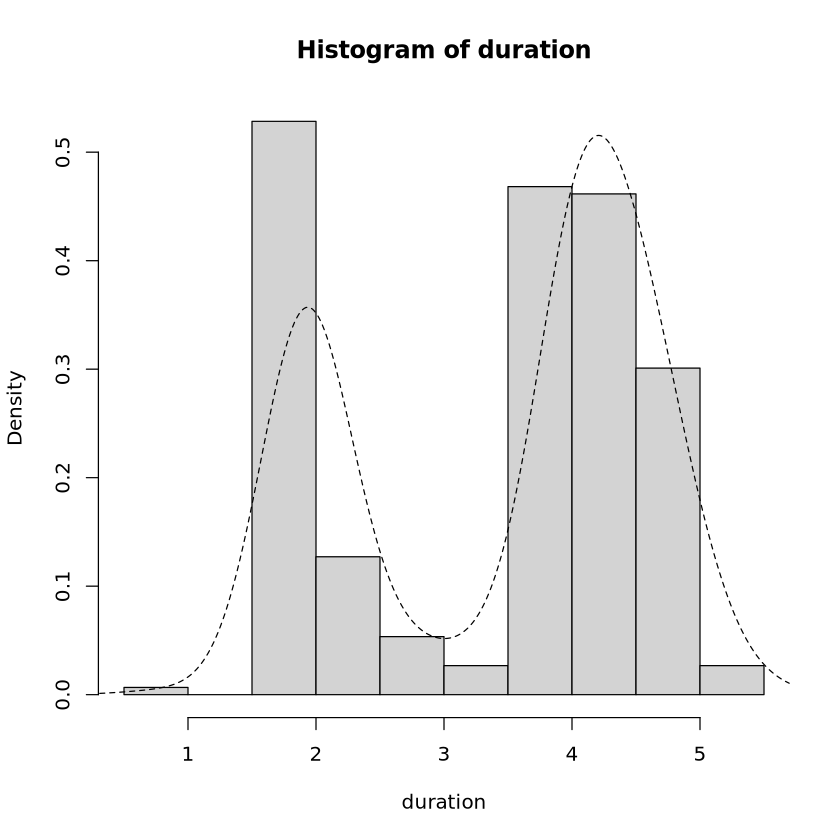

In [3]:
hist(duration, freq = F)
lines(density(duration), lty = 2)

In [5]:
x = c(-2.1, -1.3, -0.4, 1.9, 5.1, 6.2)
b = 0.9*min(sd(x), IQR(x)/1.35)*length(x)^(-1/5)
b  ## default b

[1] 2.171331

`-` 등고선 그림, 전망도

`-` 보자기 플롯

In [11]:
library(aplpack)
data(car.test.frame)
attach(car.test.frame)

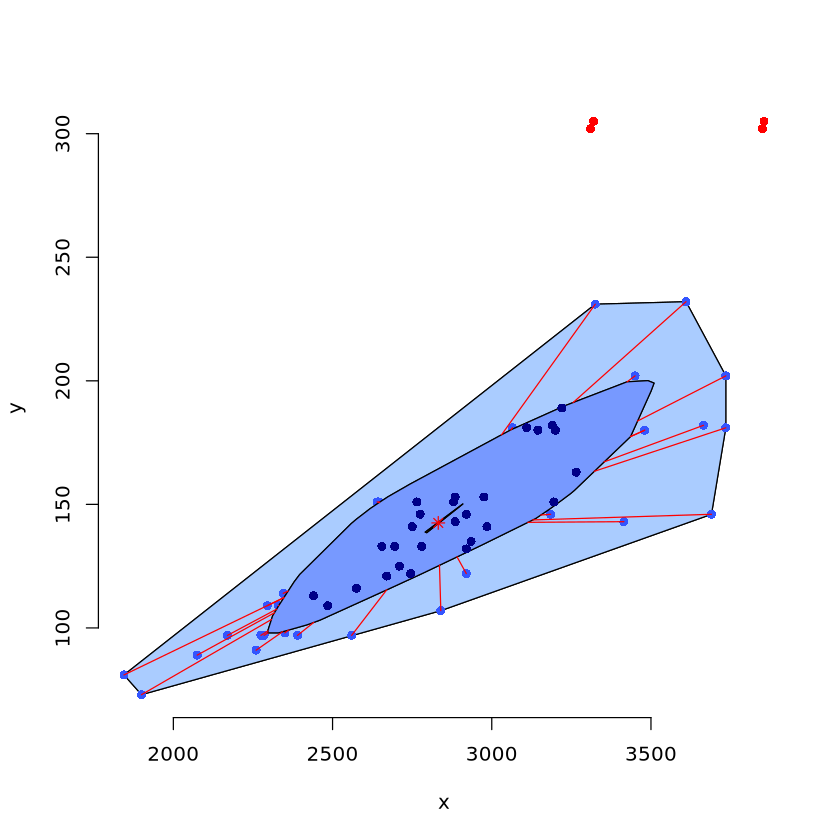

In [12]:
aplpack::bagplot(x = Weight, y = Disp., show.whiskers = T, cex = 1)

1. 위

`-` 조각 별 선형회귀